In [26]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [27]:
df = pd.read_csv('../data/datatran_2016-2017.csv')
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(184224, 32)

In [28]:
df.head()

,br,causa_acidente,classificacao_acidente,condicao_metereologica,delegacia,dia_semana,fase_dia,feridos,feridos_graves,feridos_leves,...,tracado_via,uf,uop,uso_solo,veiculos,hora,ano,mes,dia,target
0,376.0,Fenômenos da Natureza ...,Com Vítimas Feridas,Chuva,DEL7/7,domingo,Plena Noite,1,1,0,...,Reta,PR,UOP05/PR,Não,1,0,2017,1,1,1
1,101.0,Falta de Atenção à Condução ...,Sem Vítimas,Chuva,DEL8/1,domingo,Plena Noite,0,0,0,...,Curva,SC,UOP02/SC,Não,1,0,2017,1,1,0
2,153.0,Animais na Pista ...,Com Vítimas Feridas,Garoa/Chuvisco,DEL7/7,domingo,Plena Noite,2,0,2,...,Reta,PR,UOP07/PR,Não,1,0,2017,1,1,1
3,153.0,Avarias e/ou desgaste excessivo no pneu ...,Com Vítimas Feridas,Céu Claro,DEL1/2,domingo,Plena Noite,1,1,0,...,Reta,GO,UOP01/GO,Sim,1,0,2017,1,1,1
4,280.0,Ingestão de Álcool ...,Com Vítimas Feridas,Chuva,DEL8/6,domingo,Plena Noite,1,0,1,...,Não Informado,SC,UOP03/SC,Não,1,0,2017,1,1,1


In [29]:
df.columns

Index(['br', 'causa_acidente', 'classificacao_acidente',
       'condicao_metereologica', 'delegacia', 'dia_semana', 'fase_dia',
       'feridos', 'feridos_graves', 'feridos_leves', 'ignorados', 'ilesos',
       'km', 'latitude', 'longitude', 'mortos', 'municipio', 'pessoas',
       'regional', 'sentido_via', 'tipo_acidente', 'tipo_pista', 'tracado_via',
       'uf', 'uop', 'uso_solo', 'veiculos', 'hora', 'ano', 'mes', 'dia',
       'target'],
      dtype='object')

In [30]:
df.target.value_counts()

1    108520
0     65167
2     10537
Name: target, dtype: int64

In [31]:
class0 = df[df.target==0].sample(10537)
class1 = df[df.target==1].sample(10537)
class2 = df[df.target==2]

df2 = shuffle(pd.concat([class0, class1, class2]))

In [32]:
dd = df2[['dia_semana', 'uf', 'br', 'km', 'causa_acidente', 'tipo_acidente', 
        'fase_dia', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'target']]
dd.dropna(inplace=True)

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
X = pd.get_dummies(dd.drop(['target'], axis=1))
y = dd['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LogisticRegression()

parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1., 1.5],
    'class_weight': ['balanced', None, {0: 0.3, 1: 0.2, 2: 0.5}]
}


scorer = make_scorer(score_func=accuracy_score)

grid_obj = GridSearchCV(model, parameters, scoring=scorer)

grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

In [36]:
best_clf

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
joblib.dump(best_clf, '../model/modelo_v0_logistic_regression.pkl') 

['../model/modelo_v0_logistic_regression.pkl']

In [38]:
y_pred = best_clf.predict(X_test)

Confusion matrix, without normalization
[[1456  491  210]
 [ 809  814  429]
 [ 433  337 1340]]


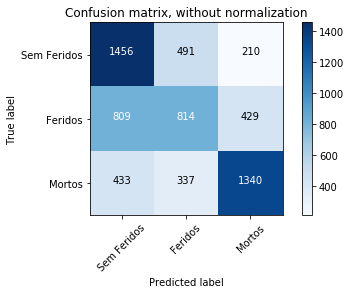

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Sem Feridos', 'Feridos', 'Mortos'],
                      title='Confusion matrix, without normalization')

In [40]:
accuracy_score(y_test, y_pred)

0.5712929260959012

In [41]:
precision0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[1,0] + cnf_matrix[1,2])
recall0 = cnf_matrix[0,0] / (cnf_matrix[0,0] + cnf_matrix[0,1] + cnf_matrix[0,2])

print('Precision classe de sem vítimas: ', precision0)
print('Recall classe de sem vítimas: ', recall0)
print('F1 classe de sem vítimas: ', 1 * ((precision0 * recall0) / (precision0 + recall0)))
print('----')

precision1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[0,1] + cnf_matrix[2,1])
recall1 = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0] + cnf_matrix[1,2])

print('Precision classe de feridos: ', precision1)
print('Recall classe de feridos: ', recall1)
print('F1 classe de feridos: ', 1 * ((precision1 * recall1) / (precision1 + recall1)))
print('----')

precision2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[0,2] + cnf_matrix[1,2])
recall2 = cnf_matrix[2,2] / (cnf_matrix[2,2] + cnf_matrix[2,0] + cnf_matrix[2,1])

print('Precision classe de mortos: ', precision2)
print('Recall classe de mortos: ', recall2)
print('F1 classe de mortos: ', 1 * ((precision2 * recall2) / (precision2 + recall2)))

Precision classe de sem vítimas:  0.540460282108389
Recall classe de sem vítimas:  0.6750115901715346
F1 classe de sem vítimas:  0.30014430014430016
----
Precision classe de feridos:  0.49573690621193667
Recall classe de feridos:  0.3966861598440546
F1 classe de feridos:  0.22035733622089873
----
Precision classe de mortos:  0.6771096513390601
Recall classe de mortos:  0.6350710900473934
F1 classe de mortos:  0.3277084861824407
